In [81]:
import numpy as np 
import pandas as pd
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [82]:
w=pd.read_csv(r"C:\Users\eyosl\Downloads\Customers.csv")
w

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [83]:
w.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [84]:
m=w.drop(['Profession','Gender'],axis=1)
m

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6
...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7
1996,1997,91,73158,32,7,7
1997,1998,87,90961,14,9,2
1998,1999,77,182109,4,7,2


In [85]:
cols=m.columns

In [86]:
def check_zero (col):
    return (len(m[col==0]))

In [87]:

for col in cols:
    print(f'there are {check_zero(w[col])}   zeroes in {col}')

there are 0   zeroes in CustomerID
there are 24   zeroes in Age
there are 2   zeroes in Annual Income ($)
there are 2   zeroes in Spending Score (1-100)
there are 431   zeroes in Work Experience
there are 0   zeroes in Family Size


In [88]:
m[cols]=m[cols].replace(0,np.NAN)
m

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19.0,15000.0,39.0,1.0,4
1,2,21.0,35000.0,81.0,3.0,3
2,3,20.0,86000.0,6.0,1.0,1
3,4,23.0,59000.0,77.0,NaN,2
4,5,31.0,38000.0,40.0,2.0,6
...,...,...,...,...,...,...
1995,1996,71.0,184387.0,40.0,8.0,7
1996,1997,91.0,73158.0,32.0,7.0,7
1997,1998,87.0,90961.0,14.0,9.0,2
1998,1999,77.0,182109.0,4.0,7.0,2


In [89]:
m.isnull().sum()

CustomerID                  0
Age                        24
Annual Income ($)           2
Spending Score (1-100)      2
Work Experience           431
Family Size                 0
dtype: int64

In [90]:
#change_col = SimpleImputer (strategy='mean')
#preproc= ColumnTransformer(transformers=[('for_numbers',change_col,[' Age',' Annual Income ($)','Spending Score (1-100)',' in Work Experience'])])

#m[[' Age',' Annual Income ($)','Spending Score (1-100)',' in Work Experience']]= preproc.fit_transform(m[[' Age',' Annual Income ($)','Spending Score (1-100)',' in Work Experience']])
#m

In [91]:
change_col = SimpleImputer (strategy='mean')#مش عارفة مش راضى يحول من نان للمتوسط لى؟
preproc= ColumnTransformer(transformers=[('for_numbers',change_col,[' Age'])])

m[[' Age']]= preproc.fit_transform(m[[' Age']])
m

KeyError: "None of [Index([' Age'], dtype='object')] are in the [columns]"

In [92]:
m=m.dropna()
m

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19.0,15000.0,39.0,1.0,4
1,2,21.0,35000.0,81.0,3.0,3
2,3,20.0,86000.0,6.0,1.0,1
4,5,31.0,38000.0,40.0,2.0,6
6,7,35.0,31000.0,6.0,1.0,3
...,...,...,...,...,...,...
1995,1996,71.0,184387.0,40.0,8.0,7
1996,1997,91.0,73158.0,32.0,7.0,7
1997,1998,87.0,90961.0,14.0,9.0,2
1998,1999,77.0,182109.0,4.0,7.0,2


In [93]:
m.isnull().sum()

CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Work Experience           0
Family Size               0
dtype: int64

In [94]:
scal=MinMaxScaler()

scal.fit(m[['Spending Score (1-100)']])
m['Spending Score (1-100)']=scal.transform(m[['Spending Score (1-100)']])

scal.fit(m[['Age']])
m['Age']=scal.transform(m[['Age']])

C:\Users\eyosl\AppData\Local\Temp\ipykernel_7816\1497481369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['Spending Score (1-100)']=scal.transform(m[['Spending Score (1-100)']])
C:\Users\eyosl\AppData\Local\Temp\ipykernel_7816\1497481369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['Age']=scal.transform(m[['Age']])


In [95]:
m['cluster']=y_predicted
m

C:\Users\eyosl\AppData\Local\Temp\ipykernel_7816\2267487548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['cluster']=y_predicted


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
0,1,0.183673,15000.0,0.383838,1.0,4,3
1,2,0.204082,35000.0,0.808081,3.0,3,2
2,3,0.193878,86000.0,0.050505,1.0,1,3
4,5,0.306122,38000.0,0.393939,2.0,6,3
6,7,0.346939,31000.0,0.050505,1.0,3,3
...,...,...,...,...,...,...,...
1995,1996,0.714286,184387.0,0.393939,8.0,7,1
1996,1997,0.918367,73158.0,0.313131,7.0,7,1
1997,1998,0.877551,90961.0,0.131313,9.0,2,1
1998,1999,0.775510,182109.0,0.030303,7.0,2,1


In [96]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(m[['Age','Spending Score (1-100)']])
y_predicted

array([1, 2, 1, ..., 3, 3, 3])

In [97]:
km.cluster_centers_

array([[0.73315747, 0.75309917],
       [0.25975138, 0.27425332],
       [0.23523665, 0.7601816 ],
       [0.75624429, 0.28149656]])

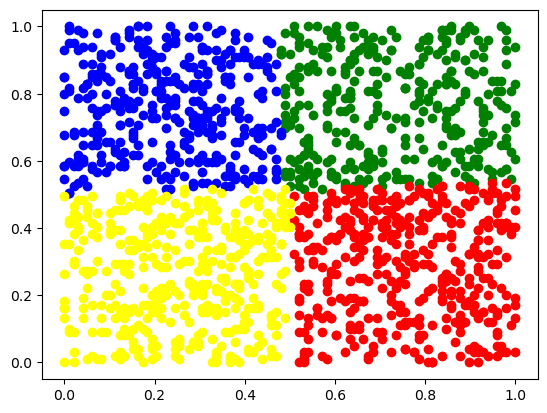

In [98]:
in1=m[m.cluster==0]
in2=m[m.cluster==1]
in3=m[m.cluster==2]
in4=m[m.cluster==3]
plt.scatter(in1.Age,in1['Spending Score (1-100)'],color='green')
plt.scatter(in2.Age,in2['Spending Score (1-100)'],color='red')
plt.scatter(in3.Age,in3['Spending Score (1-100)'],color='blue')
plt.scatter(in4.Age,in4['Spending Score (1-100)'],color='yellow')

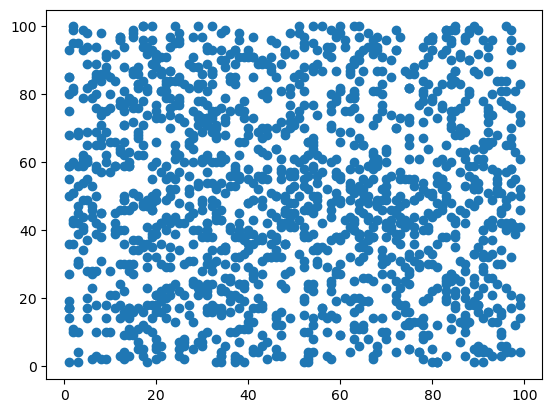

In [73]:
plt.scatter(m.Age,m['Spending Score (1-100)'])

In [101]:
sse=[]

for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(m[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)
sse    

C:\Users\eyosl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[249.5140612147281,
 153.74182129928198,
 97.48977922615772,
 65.26494789995436,
 53.62729776847542,
 44.46822780827646,
 36.715223915196624,
 32.22326650736816,
 28.296209335838928]

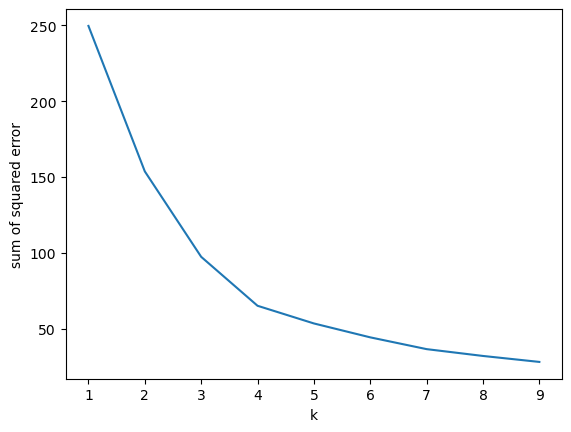

In [102]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(range(1,10),sse)